<a href="https://colab.research.google.com/github/xooseul/Portofolio/blob/main/Tanitama_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOKUMENTASI FILE PROJECT KLASIFIKASI

## Bagaimana menjalankan file ini ?

1. Buka akun kaggle anda
2. Pada bagian profile klik settings
3. Scroll ke bawah dan klik tombol *Create API Token*
4. Setelah file *kaggle.json* terunduh, klik *runtime* dan klik *run All*
5. Pastikan file json yang anda unduh di kaggle memiliki nama *kaggle.json*, jika beda silakan rename
6. Setelah anda klik *run All*, upload file *kaggle.json* tadi yang sudah anda unduh di google colab

## Isi dataset tanaman
1. Dataset Tanaman Tomat
2. Dataset Tanaman Jagung
3. Dataset Tanaman Padi
4. Dataset Tanaman Kentang

* Dataset diambil dari beberapa sumber seperti kaggle dan github
* Dataset kentang health kurang dari 1000 jadi saya mengambil image data dari sumber dataset lain

## Link Dataset yang Di Pakai

1. Dataset Padi :
* https://www.kaggle.com/datasets/prabhan78/paddy-diseases-classification

2. Dataset Jagung :
* https://www.kaggle.com/code/omreekapon/corn-and-maize-diseases-classification/log

3. Dataset Tomat :
* https://www.kaggle.com/datasets/muhammadikhwankhalid/data-penyakit-pada-tanaman (Saya mengambil dataset tomat saja)

4. Dataset Kentang :
* https://github.com/rizqiamaliatuss/PotatoLeafDiseaseClassification.git

In [ ]:
import tensorflow

print(tensorflow.__version__)

2.12.0


## Collect the dataset

In [ ]:
# upload your file api from kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurulkhairunisa","key":"ed51b31c2f4cbed10153958595931232"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# install library kaggle with pip
!pip install kaggle
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# download your dataset
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset
!kaggle datasets download -d muhammadikhwankhalid/data-penyakit-pada-tanaman
!kaggle datasets download -d prabhan78/paddy-diseases-classification
!git clone https://github.com/rizqiamaliatuss/PotatoLeafDiseaseClassification.git

 96% 154M/161M [00:03<00:00, 62.7MB/s]
100% 161M/161M [00:03<00:00, 55.0MB/s]
100% 471M/473M [00:11<00:00, 61.9MB/s]
100% 473M/473M [00:11<00:00, 43.3MB/s]
 99% 772M/782M [00:16<00:00, 58.7MB/s]
100% 782M/782M [00:16<00:00, 48.5MB/s]
Cloning into 'PotatoLeafDiseaseClassification'...
remote: Enumerating objects: 5088, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 5088 (delta 14), reused 1 (delta 0), pack-reused 5064
Receiving objects: 100% (5088/5088), 1.87 GiB | 32.20 MiB/s, done.
Resolving deltas: 100% (278/278), done.
Updating files: 100% (4497/4497), done.


In [ ]:
import os
import splitfolders
import zipfile
import shutil
import random
import tensorflow as tf

In [ ]:
# Extract dataset kaggle
base_dir = '/content/capstone/dataset'

lokal_zip = [
    '/content/corn-or-maize-leaf-disease-dataset.zip',
    '/content/data-penyakit-pada-tanaman.zip',
    '/content/paddy-diseases-classification.zip',
]

for ds in lokal_zip:
  zip_ext = zipfile.ZipFile(ds, 'r')
  if 'paddy' in ds:
    zip_ext.extractall(os.path.join(os.path.join(base_dir, 'dummy'), 'padi'))
  else:
    zip_ext.extractall(os.path.join(base_dir, 'dummy'))

  zip_ext.close()

In [ ]:
# move the dataset
!mv /content/PotatoLeafDiseaseClassification/dataset /content/capstone/dataset/dummy

## Get info all dataset

In [ ]:
# get info the dataset 1
# dataset tomat
path_data1 = '/content/capstone/dataset/dummy/content/custom-train-test(color)/Custom-Train-Test(color)/color'
items = os.listdir(path_data1)
class_tomat = 0
for folder in items:
  f_path = os.path.join(path_data1, folder)
  sub_data = os.listdir(f_path)
  # print(f"{folder} : {len(sub_data)}")

  if 'Daun_Tomat_' in folder :
    print(f"{folder} : {len(sub_data)}")
    class_tomat += 1

  # i = 0
  # for img in sub_data:
  #   if os.path.getsize(os.path.join(f_path, img)) < 1:
  #     i += 1
  # else:
  #   print(f"Total gambar kosong : {i}")
else:
  print()
  print(f"Total folder : {len(items)}")
  print(f"Total folder tomat : {class_tomat}")

Daun_Tomat_Jamur_Target_spot : 1374
Daun_Tomat_Jamur_Fulva : 922
Daun_Tomat_Virus_Mosaicvirus : 343
Daun_Tomat_Tungau_Labalaba : 1646
Daun_Tomat_Hawar_Tua : 1879
Daun_Tomat_Bakteri : 2097
Daun_Tomat_Virus_Begomovirus : 5327
Daun_Tomat_Sehat : 1561
Daun_Tomat_Hawar_Muda : 970
Daun_Tomat_Jamur_Septoria : 1741

Total folder : 25
Total folder tomat : 10


In [ ]:
# Rename class folder dataset 2
!mv /content/capstone/dataset/dummy/data/Blight /content/capstone/dataset/dummy/data/Daun_Jagung_Hawar
!mv /content/capstone/dataset/dummy/data/Common_Rust /content/capstone/dataset/dummy/data/Daun_Jagung_Karat_Biasa
!mv /content/capstone/dataset/dummy/data/Gray_Leaf_Spot /content/capstone/dataset/dummy/data/Daun_Jagung_Bintik_Daun_Abu-abu
!mv /content/capstone/dataset/dummy/data/Healthy /content/capstone/dataset/dummy/data/Daun_Jagung_Sehat

# Rename the name folder corn dataset
!mv /content/capstone/dataset/dummy/data /content/capstone/dataset/dummy/jagung

In [ ]:
# get info the dataset 2
# dataset jagung
path_data2 = '/content/capstone/dataset/dummy/jagung'

for folder in os.listdir(path_data2):
  print(f"{folder} : {len(os.listdir(os.path.join(path_data2, folder)))}")

Daun_Jagung_Bintik_Daun_Abu-abu : 574
Daun_Jagung_Sehat : 1162
Daun_Jagung_Hawar : 1146
Daun_Jagung_Karat_Biasa : 1306


In [ ]:
# rename folder dataset padi
!mv /content/capstone/dataset/dummy/padi/tungro /content/capstone/dataset/dummy/padi/Daun_Padi_Tungro
!mv /content/capstone/dataset/dummy/padi/normal /content/capstone/dataset/dummy/padi/Daun_Padi_Sehat
!mv /content/capstone/dataset/dummy/padi/dead_heart /content/capstone/dataset/dummy/padi/Daun_Padi_Dead_Heart
!mv /content/capstone/dataset/dummy/padi/blast /content/capstone/dataset/dummy/padi/Daun_Padi_Dead_Blast
!mv /content/capstone/dataset/dummy/padi/hispa /content/capstone/dataset/dummy/padi/Daun_Padi_Dead_Hispa
!mv /content/capstone/dataset/dummy/padi/bacterial_leaf_blight /content/capstone/dataset/dummy/padi/Daun_Padi_Bacterial_Leaf_Blight
!mv /content/capstone/dataset/dummy/padi/bacterial_leaf_streak /content/capstone/dataset/dummy/padi/Daun_Padi_Bacterial_Leaf_Streak
!mv /content/capstone/dataset/dummy/padi/bacterial_panicle_blight /content/capstone/dataset/dummy/padi/Daun_Padi_Bacterial_Panicle_Blight
!mv /content/capstone/dataset/dummy/padi/brown_spot /content/capstone/dataset/dummy/padi/Daun_Padi_Brown_Spot
!mv /content/capstone/dataset/dummy/padi/downy_mildew /content/capstone/dataset/dummy/padi/Daun_Padi_Downy_Mildew

In [ ]:
# get info the dataset 3
# dataset padi
path_data3 = '/content/capstone/dataset/dummy/padi'

for folder in os.listdir(path_data3):
  print(f"{folder} : {len(os.listdir(os.path.join(path_data3, folder)))}")
  # if len(os.listdir(os.path.join(path_data3, folder))) > 1000:
  #   print(f"{folder} : {len(os.listdir(os.path.join(path_data3, folder)))}")
else:
  print()
  print(f"Total jumlah kelas dataset padi {len(os.listdir(path_data3))}")

Daun_Padi_Downy_Mildew : 620
Daun_Padi_Bacterial_Panicle_Blight : 337
Daun_Padi_Tungro : 1088
Daun_Padi_Sehat : 1764
Daun_Padi_Dead_Blast : 1738
Daun_Padi_Bacterial_Leaf_Streak : 380
Daun_Padi_Bacterial_Leaf_Blight : 479
Daun_Padi_Dead_Hispa : 1594
Daun_Padi_Dead_Heart : 1442
Daun_Padi_Brown_Spot : 965

Total jumlah kelas dataset padi 10


In [ ]:
# Rename the dataset 4
# dataset kentang
!mv /content/capstone/dataset/dummy/dataset /content/capstone/dataset/dummy/kentang

In [ ]:
# rename kelas dataset kentang
!mv /content/capstone/dataset/dummy/kentang/Virus /content/capstone/dataset/dummy/kentang/Daun_Kentang_Virus
!mv /content/capstone/dataset/dummy/kentang/Healthy /content/capstone/dataset/dummy/kentang/Daun_Kentang_Healthy
!mv '/content/capstone/dataset/dummy/kentang/Phytopthora Infestans' /content/capstone/dataset/dummy/kentang/Daun_Kentang_Phytopthora_Infestans
!mv '/content/capstone/dataset/dummy/kentang/Alternaria Solani' /content/capstone/dataset/dummy/kentang/Daun_Kentang_Alternaria_Solani
!mv /content/capstone/dataset/dummy/kentang/Insect /content/capstone/dataset/dummy/kentang/Daun_Kentang_Insect

In [ ]:
# get info the dataset 4
# dataset kentang
path_data4 = '/content/capstone/dataset/dummy/kentang'

for folder in os.listdir(path_data4):
  # if len(os.listdir(os.path.join(path_data4, folder))) > 1000:
  print(f"{folder} : {len(os.listdir(os.path.join(path_data4, folder)))}")
else:
  print()
  print(f"Total jumlah kelas dataset kentang {len(os.listdir(path_data4))}")

Daun_Kentang_Insect : 302
Daun_Kentang_Healthy : 893
Daun_Kentang_Phytopthora_Infestans : 1229
Daun_Kentang_Alternaria_Solani : 1055
Daun_Kentang_Virus : 1012

Total jumlah kelas dataset kentang 5


# Move class dataset to list for training


### Define name folder for dataset

In [ ]:
# Dataset tomat
path_tomat = '/content/capstone/dataset/dummy/content/custom-train-test(color)/Custom-Train-Test(color)/color'
tomat_set = [
    folder for folder in os.listdir(path_tomat) if 'Daun_Tomat_' in folder
]
print(f"Total class tomat : {len(tomat_set)}")

# Dataset kentang
path_kentang = '/content/capstone/dataset/dummy/kentang'
kentang_set = [
    folder for folder in os.listdir(path_kentang)
]
print(f"Total class kentang : {len(kentang_set)}")

# Dataset padi
path_padi = '/content/capstone/dataset/dummy/padi'
padi_set = [
    folder for folder in os.listdir(path_padi)
]
print(f"Total class padi : {len(padi_set)}")

# Dataset jagung
path_jagung = '/content/capstone/dataset/dummy/jagung'
jagung_set = [
    folder for folder in os.listdir(path_jagung)
]
print(f"Total class jagung : {len(jagung_set)}")

Total class tomat : 10
Total class kentang : 5
Total class padi : 10
Total class jagung : 4


## Define base path for tanitama dataset

In [ ]:
# Define folder for dataset train
path_tanitama = '/content/capstone/dataset/tanitama'
os.makedirs(path_tanitama)

### Move dataset tomat

In [ ]:
print(len(tomat_set))
tomat_set

10


['Daun_Tomat_Jamur_Target_spot',
 'Daun_Tomat_Jamur_Fulva',
 'Daun_Tomat_Virus_Mosaicvirus',
 'Daun_Tomat_Tungau_Labalaba',
 'Daun_Tomat_Hawar_Tua',
 'Daun_Tomat_Bakteri',
 'Daun_Tomat_Virus_Begomovirus',
 'Daun_Tomat_Sehat',
 'Daun_Tomat_Hawar_Muda',
 'Daun_Tomat_Jamur_Septoria']

In [ ]:
tanitama_tomat = os.path.join(path_tanitama, 'tomat')
os.makedirs(tanitama_tomat)
tomat_sakit = os.path.join(tanitama_tomat, 'tomat_sakit')
os.makedirs(tomat_sakit)
tomat_sehat = os.path.join(tanitama_tomat, 'tomat_sehat')
os.makedirs(tomat_sehat)

for sub_f in tomat_set:
  folder = os.path.join(path_tomat, sub_f)
  if sub_f != 'Daun_Tomat_Sehat':
    num_f = 60 if sub_f == 'Daun_Tomat_Bakteri' else 55
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, num_f)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(tomat_sakit, f))
  else:
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, 500)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(tomat_sehat, f))

### Move dataset kentang

In [ ]:
print(len(kentang_set))
kentang_set

5


['Daun_Kentang_Insect',
 'Daun_Kentang_Healthy',
 'Daun_Kentang_Phytopthora_Infestans',
 'Daun_Kentang_Alternaria_Solani',
 'Daun_Kentang_Virus']

In [ ]:
tanitama_kentang = os.path.join(path_tanitama, 'kentang')
os.makedirs(tanitama_kentang)
kentang_sakit = os.path.join(tanitama_kentang, 'kentang_sakit')
os.makedirs(kentang_sakit)
kentang_sehat = os.path.join(tanitama_kentang, 'kentang_sehat')
os.makedirs(kentang_sehat)

for sub_f in kentang_set:
  folder = os.path.join(path_kentang, sub_f)
  if sub_f != 'Daun_Kentang_Healthy':
    num_f = 125
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, num_f)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(kentang_sakit, f))
  else:
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, 500)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(kentang_sehat, f))

### Move dataset jagung

In [ ]:
print(len(jagung_set))
jagung_set

4


['Daun_Jagung_Bintik_Daun_Abu-abu',
 'Daun_Jagung_Sehat',
 'Daun_Jagung_Hawar',
 'Daun_Jagung_Karat_Biasa']

In [ ]:
tanitama_jagung = os.path.join(path_tanitama, 'jagung')
os.makedirs(tanitama_jagung)
jagung_sakit = os.path.join(tanitama_jagung, 'jagung_sakit')
os.makedirs(jagung_sakit)
jagung_sehat = os.path.join(tanitama_jagung, 'jagung_sehat')
os.makedirs(jagung_sehat)

for sub_f in jagung_set:
  folder = os.path.join(path_jagung, sub_f)
  if sub_f != 'Daun_Jagung_Sehat':
    num_f = 170 if sub_f == 'Daun_Jagung_Hawar' else 165
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, num_f)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(jagung_sakit, f))
  else:
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, 500)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(jagung_sehat, f))

### Move dataset padi

In [ ]:
print(len(padi_set))
padi_set

10


['Daun_Padi_Downy_Mildew',
 'Daun_Padi_Bacterial_Panicle_Blight',
 'Daun_Padi_Tungro',
 'Daun_Padi_Sehat',
 'Daun_Padi_Dead_Blast',
 'Daun_Padi_Bacterial_Leaf_Streak',
 'Daun_Padi_Bacterial_Leaf_Blight',
 'Daun_Padi_Dead_Hispa',
 'Daun_Padi_Dead_Heart',
 'Daun_Padi_Brown_Spot']

In [ ]:
tanitama_padi = os.path.join(path_tanitama, 'padi')
os.makedirs(tanitama_padi)
padi_sakit = os.path.join(tanitama_padi, 'padi_sakit')
os.makedirs(padi_sakit)
padi_sehat = os.path.join(tanitama_padi, 'padi_sehat')
os.makedirs(padi_sehat)

for sub_f in padi_set:
  folder = os.path.join(path_padi, sub_f)
  if sub_f != 'Daun_Padi_Sehat':
    num_f = 60 if sub_f == 'Daun_Padi_Dead_Blast' else 55
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, num_f)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(padi_sakit, f))
  else:
    list_f = os.listdir(folder)
    list_f_copy = random.sample(list_f, 500)
    for f in list_f_copy:
      shutil.copy2(os.path.join(folder, f), os.path.join(padi_sehat, f))

# Check the dataset tanitama for ready training model

In [ ]:
tanitama_dataset = '/content/capstone/dataset/tanitama'
item_tanitama = os.listdir(tanitama_dataset)

total_data = 0
total_class = 0
for sub_item in item_tanitama:
  for item in os.listdir(os.path.join(tanitama_dataset, sub_item)):
    print(f"{item} : {len(os.listdir(os.path.join(os.path.join(tanitama_dataset, sub_item), item)))}")
    total_data += len(os.listdir(os.path.join(os.path.join(tanitama_dataset, sub_item), item)))
    total_class += 1
else:
  print()
  print(f"Total data class : {total_class}")
  print(f"Total data train : {total_data}")

tomat_sakit : 500
tomat_sehat : 500
padi_sehat : 500
padi_sakit : 500
jagung_sehat : 500
jagung_sakit : 500
kentang_sehat : 500
kentang_sakit : 500

Total data class : 8
Total data train : 4000


# Check size of image

In [ ]:
from PIL import Image

# gambar = Image.open('/content/capstone/dataset/tanitama/jagung/jagung_sakit/Corn_Blight (1005).JPG')
# gambar.size

list_size_img = []
for sub_folder in item_tanitama:
  for sub_class in os.listdir(os.path.join(tanitama_dataset, sub_folder)):
    for img in os.listdir(os.path.join(os.path.join(tanitama_dataset, sub_folder), sub_class)):
      gambar = Image.open(os.path.join(os.path.join(os.path.join(tanitama_dataset, sub_folder), sub_class), img))
      img_size = gambar.size
      if img_size not in list_size_img:
        list_size_img.append(img_size)


In [ ]:
# len(list_size_img)
print(min(list_size_img))
print(max(list_size_img))

(185, 500)
(3456, 5184)


# Move class training to dataset

In [ ]:
tanitama_set = '/content/capstone/dataset/tanitama_set'

for sub_folder in item_tanitama:
  for sub_class in os.listdir(os.path.join(tanitama_dataset, sub_folder)):
    shutil.copytree(os.path.join(os.path.join(tanitama_dataset, sub_folder), sub_class), os.path.join(tanitama_set, sub_class))

## check size dataset again

In [ ]:
total_img = 0
for sub_class in os.listdir(tanitama_set):
  print(f"{sub_class} : {len(os.listdir(os.path.join(tanitama_set, sub_class)))}")
  total_img += len(os.listdir(os.path.join(tanitama_set, sub_class)))
else:
  print()
  print(f"Total class : {len(os.listdir(tanitama_set))}")
  print(f"Total image data : {total_img}")

jagung_sehat : 500
padi_sehat : 500
kentang_sehat : 500
kentang_sakit : 500
tomat_sakit : 500
tomat_sehat : 500
padi_sakit : 500
jagung_sakit : 500

Total class : 8
Total image data : 4000


# Move dataset tanitama to drive

# Split tanitama set to train and validation

In [ ]:
import splitfolders

# Membagi isi direktori dataset menjadi 2 folder train dan val menggunakan split folders
# Menggunakan rasio 80 : 20 dari dataset yang tersedia
splitfolders.ratio('/content/capstone/dataset/tanitama_set', '/content/capstone/dataset/tanitama_dataset', seed=42, ratio=(.8, .2))

Copying files: 4000 files [00:03, 1214.87 files/s]


# Create the model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/capstone/dataset/tanitama_dataset/train"
training_datagen = ImageDataGenerator(rescale = 1./255.)

VALIDATION_DIR = "/content/capstone/dataset/tanitama_dataset/val"
validation_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
history = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/15
50/50 [==============================] - 360s 7s/step - loss: 1.5255 - accuracy: 0.3859 - val_loss: 1.1317 - val_accuracy: 0.5612
Epoch 2/15
50/50 [==============================] - 361s 7s/step - loss: 1.0052 - accuracy: 0.6194 - val_loss: 0.8514 - val_accuracy: 0.7100
Epoch 3/15
50/50 [==============================] - 343s 7s/step - loss: 0.8068 - accuracy: 0.6900 - val_loss: 0.7710 - val_accuracy: 0.6725
Epoch 4/15
50/50 [==============================] - 368s 7s/step - loss: 0.7069 - accuracy: 0.7222 - val_loss: 0.6503 - val_accuracy: 0.7375
Epoch 5/15
50/50 [==============================] - 360s 7s/step - loss: 0.6155 - accuracy: 0.7622 - val_loss: 0.6477 - val_accuracy: 0.7375
Epoch 6/15
50/50 [==============================] - 360s 7s/step - loss: 0.5632 - accuracy: 0.7797 - val_loss: 0.5485 - val_accuracy: 0.7887
Epoch 7/15
50/50 [==============================] - 364s 7s/step - loss: 0.5205 - accuracy: 0.7937 - val_loss: 0.5952 - val_accuracy: 0.7738
Epoch 8/15
50

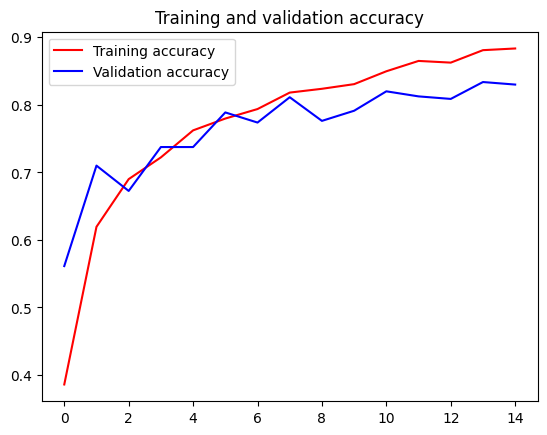

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

In [ ]:
# import time
# saved_model_path = "./{}.h5".format(int(time.time()))

# model.save(saved_model_path)